In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    x1 = np.linspace(-.1, 1.1)
    x2 = -W_[1] / W_[2] * x1  - W_[0] / W_[2]
    plt.plot(x1, x2, '--k')

    plt.grid()
    plt.show()

## FeedForward Model
$$\hat{y^{(i)}} = \sigma(x^{(i)}W)$$
1. Feature 정리
1. Linear Model
$$ z = x W =
\begin{bmatrix}
1 & x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2
\end{bmatrix}=w_0 + w_1 x_1 + w_2x_2
$$
1. Sigmoid
$$ \sigma(z)=\frac{1}{1+e^{-z}}$$

### 00. 데이터 만들기

In [3]:
W = np.array([-4./5., 3./4., 1.0])

np.random.seed(327)
xy = np.random.rand(30,2)
labels = np.zeros(len(xy))
labels[W[0] + W[1] * xy[:,0] + W[2] * xy[:,1] > 0] = 1

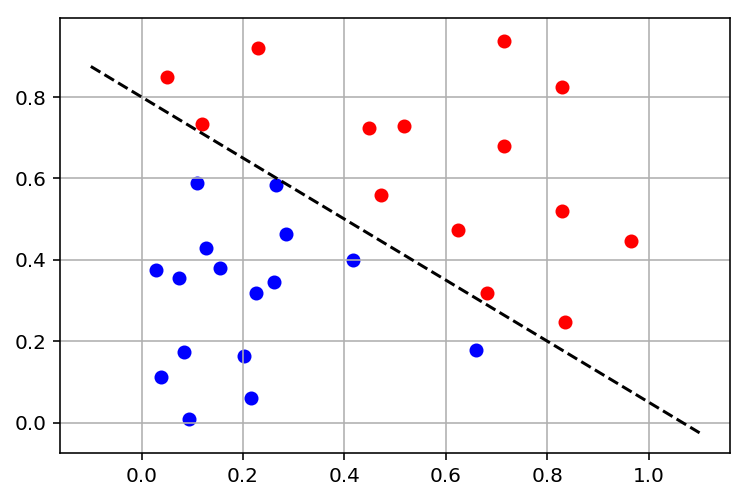

In [4]:
plot_scatter(W, xy, labels)

### 01. Feature 정리

In [5]:
# TODO 1
features = np.array([[1.0, x, y] for x, y in xy])
features[:10]

array([[1.        , 0.44795858, 0.72428867],
       [1.        , 0.28380741, 0.46408744],
       [1.        , 0.71479014, 0.67975137],
       [1.        , 0.02897187, 0.3739039 ],
       [1.        , 0.62358144, 0.4734709 ],
       [1.        , 0.51783612, 0.72832152],
       [1.        , 0.26099338, 0.34596232],
       [1.        , 0.83509598, 0.24632146],
       [1.        , 0.68179324, 0.31754929],
       [1.        , 0.20170095, 0.16371035]])

### 02. Linear Model

In [6]:
W0 = np.array([-0.5, 0.7, 1.8])

In [7]:
# TODO 2
z = np.matmul(features, W0)
np.testing.assert_array_almost_equal(z, np.array([ 1.1172906 ,  0.53402258,  1.22390556,  0.19330732,  0.78875462,
        1.17346402,  0.30542755,  0.52794582,  0.54884399, -0.06413071,
        0.23320688,  0.97782638,  0.51098053,  0.63402059,  0.73668692,
        1.68662909,  0.28106909, -0.41730228,  1.01458033,  0.19097579,
        0.36345836,  1.06505976,  1.56410043, -0.23806984,  0.83925937,
       -0.12982293, -0.27262993,  0.90340202,  0.29225019,  1.31651721]))
print("Test passed.")

Test passed.


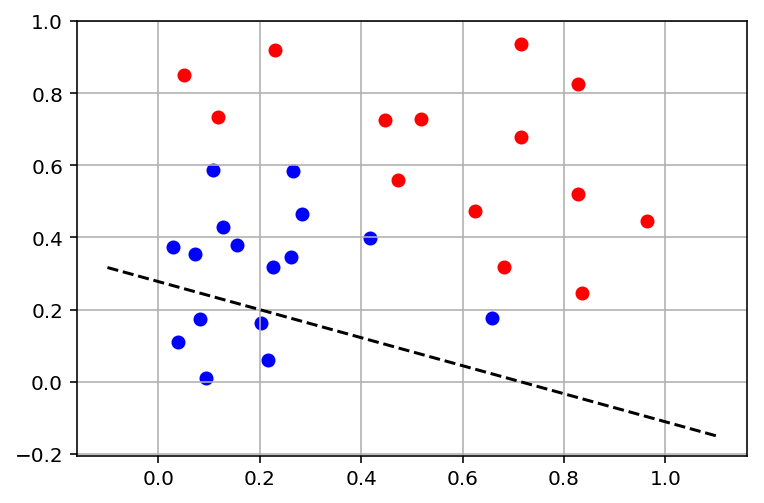

In [8]:
plot_scatter(W0, xy, labels)

### 03. Sigmoid

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [9]:
# TODO 3
sigmoid = lambda z: 1.0 / ( 1.0 + np.exp(-z))

In [10]:
np.testing.assert_almost_equal(sigmoid(0.7), 0.66818777216816616)
print("Test3 passed.")

Test3 passed.


### 04. Final Model

In [11]:
# TODO 4
z =  np.dot(features, W0)
model = sigmoid(z)
np.testing.assert_array_almost_equal(model, np.array([ 0.75348581,  0.63042083,  0.77275013,  0.5481769 ,  0.68756386,
        0.76377058,  0.57576879,  0.62900388,  0.63386735,  0.48397281,
        0.55803892,  0.72667671,  0.6250363 ,  0.65340056,  0.67627095,
        0.84378034,  0.56980831,  0.39716247,  0.73391557,  0.54759937,
        0.58987735,  0.74365628,  0.82694095,  0.44076206,  0.69830921,
        0.46758978,  0.43226157,  0.71164812,  0.57254693,  0.78860168]))
print("Test4 passed.")

Test4 passed.


## Loss function
$$loss(y, \hat{y}) = \frac{1}{30}\sum_{i=1}^{30}-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})$$

In [12]:
# TODO 5
def cross_entropy(y, yhat):
    val = 0.0
    for yi, yhati in zip(y, yhat):
        val = val - yi * np.log(yhati) \
                  - (1. - yi) * np.log(1. - yhati)
    return val / len(y)

In [13]:
val = cross_entropy(labels, model)
np.testing.assert_array_almost_equal(val, 0.576046231617877)
print("Test5 passed.")

Test5 passed.


## BackPropagation

1. sigmoid의 미분
1. linear model의 미분
1. FeedForward Model의 미분(Chian Rule)

### 01. sigmoid의 미분
\begin{align}
\sigma'(z) &= \left[\frac{1}{1+e^{-z}}\right]'\\
&= \left(-\frac{1}{(1+e^{-z})^2}\right) \cdot \left(-e^{-z}\right)\\
&= \frac{e^{-z}}{(1+e^{-z})^2}\\
&= \frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}}\\
&= \frac{1}{1+e^{-z}}\frac{1 + e^{-z} - 1}{1+e^{-z}}\\
&= \frac{1}{1+e^{-z}}\left(1 - \frac{1}{1+e^{-z}}\right)\\
&= \sigma(z) (1-\sigma(z))
\end{align}

In [14]:
sigmoid_prime = lambda z: sigmoid(z) * (1 - sigmoid(z))

### 02. Linear model의 미분

\begin{align}
\frac{\partial}{\partial W_j}\left(xW\right) &= \frac{\partial}{\partial W_j}\left(\sum_{i=1}^d x_iW_i \right)\\
&= x_j
\end{align}

### 03. FeedForward Model의 미분

\begin{align}
    \frac{\partial}{\partial W_j}\hat{y_i} &= \frac{\partial}{\partial W_j}\sigma(x_iW)\\
    &= \frac{\partial}{\partial z}\sigma(z)\frac{\partial z}{\partial W_j}\\
    &=\sigma'(z)\frac{\partial z}{\partial W_j}\\
    &=\sigma'(z)\frac{\partial (x_iW)}{\partial W_j}\\
    &=\sigma(z)(1-\sigma(z))\frac{\partial (x_iW)}{\partial W_j}\\
    &=\sigma(z)(1-\sigma(z))x_j\\
    &=\hat{y_i}(1-\hat{y_i})x_j
\end{align}

### 04. Backpropagation

\begin{align}
\frac{1}{30}\sum_{i=1}^{30}\frac{\partial}{\partial W_j}\left(-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})\right)
&=\frac{1}{30}\sum_{i=1}^{30}-(y_i-\hat{y_i}) x_j
\end{align}

In [15]:
def grad_loss(W_, features, labels):
    val = np.zeros_like(W0)
    for xi, yi in zip(features, labels):
        # TODO 6
        yhati = sigmoid(np.dot(xi, W_))
        val += -(yi - yhati) * xi
    return val / len(labels)

In [16]:
grad = grad_loss(W0, features, labels)
np.testing.assert_array_almost_equal(grad, np.array([ 0.16942214, -0.00927518,  0.02356192]))
print("Test6 passed.")

Test6 passed.


## Gradient Descent

In [17]:
lr = 0.1
MaxEpochs = 1000
W0_ = W0
for epoch in range(MaxEpochs):
    # TODO 7
    grad = grad_loss(W0_, features, labels)
    W1 = W0_ - lr * grad
    W0_ = W1
W_gd = W0_

0.576046231617877


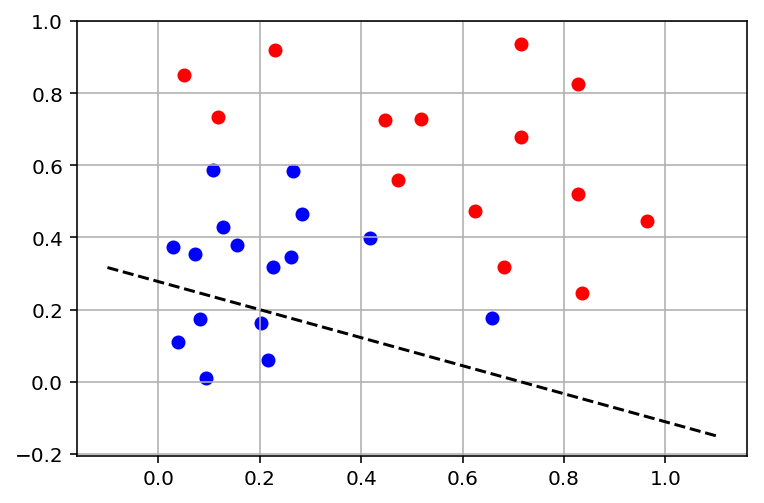

In [18]:
print(cross_entropy(labels, sigmoid(np.dot(features, W0))))
plot_scatter(W0, xy, labels)

0.2903407055588286


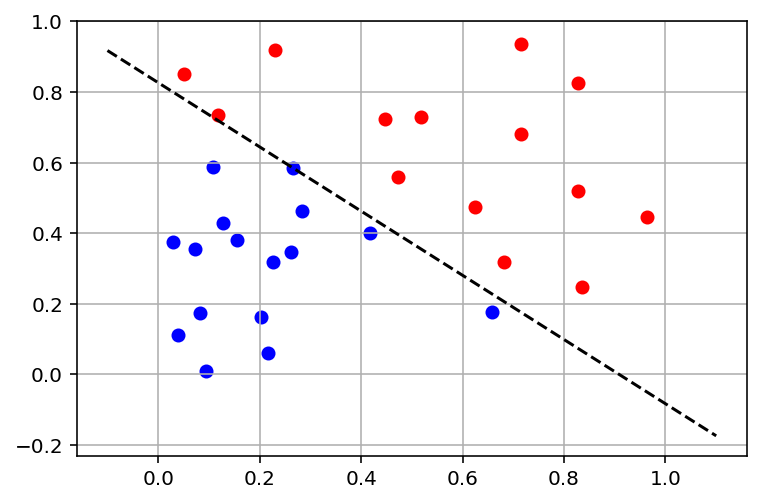

In [19]:
print(cross_entropy(labels, sigmoid(np.dot(features, W_gd))))
plot_scatter(W_gd, xy, labels)

## Stochastic Gradient Descent

In [20]:
from helper import generate_batches
batch_size = 10
lr = 0.1
MaxEpochs = 1000
W0_ = W0

# TODO 8
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

for epoch in range(MaxEpochs):
    # TODO 9
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        grad = grad_loss(W0_, x_batch, y_batch)
        W1 = W0_ - lr * grad
        W0_ = W1
W_sgd = W0_

0.19916347680533228


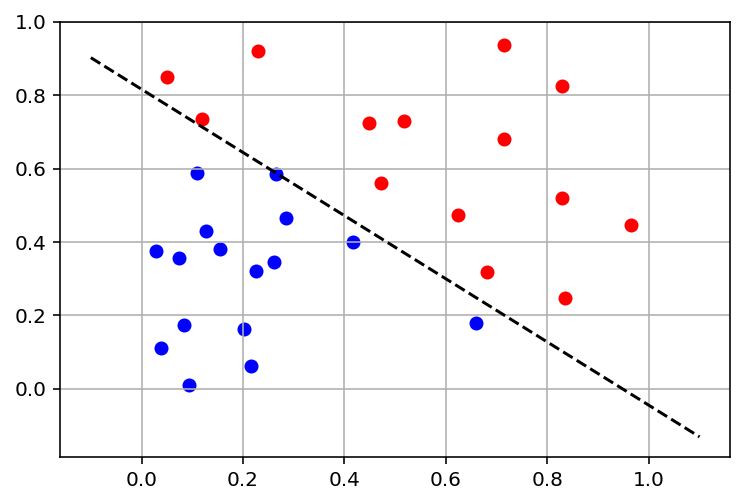

In [21]:
print(cross_entropy(labels, sigmoid(np.dot(features, W_sgd))))
plot_scatter(W_sgd, xy, labels)